# Twitter, JSON, APIs, Twitter API, MongoDB, Rate-limits

## Introduction to Twitter

### What is Twitter?
-------------------------------
Twitter is a micro-blogging social network website, where users post 280 (previously 140) characters long messages called 'Tweets'.

### Let's make your twitter account

Link : https://twitter.com/

### India on Twitter

There are roughly 35 million Indian users on twitter. 
News travels really fast through twitter.
There are many interesting influencers on twitter like actors, politicians, sports people, academics and journalists and they are followed by a **massive number** of common people.

### User actions on Twitter
> - Tweet -- Post a message with image/video and text within 240 characters on Twitter.
> - Retweet -- Retweet or share a tweet made by another user within Twitter.
> - Reply -- Post a message in respose to another user's tweet.
> - Mentions -- Tag another user in his/her tweet or reply.
> - Hashtag -- Another tag used to link to a topic or event.
> - Follow -- Follow or subscribe to a user's tweets. A Follower is a user that follows, and the user that is being followed in followee.
> - Search -- To search for tweets posted by other accounts based on a query.

# JSON 

JSON is a format of storing and tranferring data. Json stands for JavaScript Object Notation 

In [ ]:
{"employees":[
    {"firstName":"John", "lastName":"Doe"}, 
    {"firstName":"Anna", "lastName":"Smith"},
    {"firstName":"Peter", "lastName":"Jones"}
]}

### Viewing JSON
JSON is not meant to be read by people. It is meant to be read and processed by computers. But if required, You can use a JSON viewing website to make it easier to view JSON Data.



Copy paste the JSON data in the above cell and paste it in the website http://jsonviewer.stack.hu/ and then click on viewer.


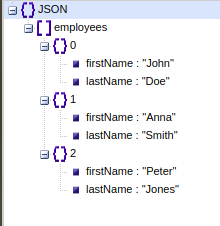

## MongoDB

![img](https://kangaroot.net/sites/default/files/styles/large/public/field/image/mongologo.png?itok=kYrVeixk)

MongoDB is a NoSQL database software.


### Why Mongo DB ?

It makes it easy to store JSON data and unstructred data.

Incontrast traditional SQL databases need a structre to store data.

Its is more fleixble and preffered when dealing with large amounts of data


#### We will be using CSV to store our collected data for the labs for simplicity

## CSV - Comma seperated values

Simple format for storing data

Can be opened by microsoft excel or even notepad

<img src="https://www.quackit.com/pix/sql_server/sql_server_2016/tutorial/save_query_to_csv_file_in_sql_server_2016_3.png" />


# APIs

## Application Programming Interfaces

APIs are services run by websites/companies/platofrms to provide access to their products to be usable through code. The idea is to create programs that can use these services to do something.

## Lets see an API in action

open the URL http://worldtimeapi.org/api/ip



### More examples:

#### Pollution data API
https://api.openaq.org/v1/parameters

documentation: https://docs.openaq.org/#api-Parameters

#### Google Books API with ISBN
https://www.googleapis.com/books/v1/volumes?q=isbn:9788129135490

#### Twitter followers (Will not work !)
https://api.twitter.com/1.1/followers/list.json

# APIs and passwords

## API KEYS

Just like when you have to login into your account, To use most API services you need to generate API keys

API Keys look like this: `l48UOcvHQGqHBQIjnHWPFuwGs`

They are a basically a set of random characters that work in a way similar to usernames and passwords.


Twitter actually assigns 4 such keys:

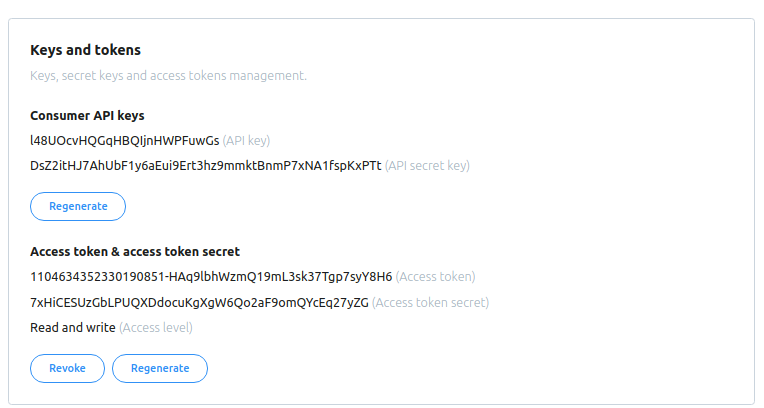


While google only assigns a single key.


## Let's make API Keys on twitter 

#### Step 1 : Create a twitter account and Login
#### Step 2 : Go to [https://developer.twitter.com](https://developer.twitter.com)
#### Step 3 : Apply for developer account
#### Step 4 : Once your developer Account is approved, create a new Application
#### Step 5 : You can access the API keys once the application has been created. You can also see the guide [here](install_guide.pdf)

### Test your API Keys

In [ ]:
cskey = "Replace this text  with your API Key"
cssecret = "Replace this text  with your API Key"
tokenkey = "Replace this text  with your API Key"
tokensec = "Replace this text  with your API Key"

import pprint
import tweepy
#for getting Stream of Data
from tweepy import Stream
from tweepy.streaming import StreamListener
auth = tweepy.OAuthHandler(cskey,cssecret)

try:
    redirect_url = auth.get_authorization_url()
    print('It Worked! Congrats You are ready for the next step.')
except tweepy.TweepError:
    print('Error! Failed to get request token. Please Check your API Keys')

# Access Token, Access Token Secret
auth.set_access_token(tokenkey,tokensec)

api = tweepy.API(auth)

 If the output of the **previous cell** shows "It Worked! Congrats You are ready for the next step."

## Lets get tweets from twitter by using the search endpoint

In [ ]:
topic = "elections2019" # you can change this also

for tweet in tweepy.Cursor(api.search,q=topic).items():
    print (tweet.text)

## Rate limits

Nearly all OSMs (Online Social media) that provide APIs have Certain limits on interactions via APIs. These are called ratelimits.

For most of your usecases, The network imposed ratelimits are sufficient. 
For example on twitter the ratelimit on the Tweets search endpoint is 180+450 that is 630 requests in a 15 minute window.

So you can get 630 * 100 that is 630,000 tweets from the search endpoint in a 15 minute window.

### Twitter
More restrictive Rate limits.

You can see all the details for twitter ratelimits here
https://developer.twitter.com/en/docs/basics/rate-limits.html

### Reddit
Less restrictive Rate limits

## Twitter Streaming API

The difference between Normal API endpoints like Search (the one used above) and streaming API is that streaming API gives you live data from twitter for a particular topic. However an important thing to note that this data is not complete and is a sample of the data whos quatity can vary between 1% and 40% of the actual data.

Using the Search API periodically can be used to get a picture for a topic than using streaming API. You can try to run the code below to get an idea about the streaming API. The cell will keep returning live tweet data till stopped by you by pressing the stop button (square button on the right side of the Run button)

In [ ]:
import json
#override tweepy.StreamListener to add logic to on_status
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            tweet_json = json.loads(data)
            print(tweet_json["created_at"])
            print(tweet_json["text"])
            return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True

twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['Elections2019']) # You can change the topic here. popular topics will give data faster

<img src = "https://cdn.vox-cdn.com/thumbor/58XMflFNgHYRdouEpEORlkMrNvM=/0x0:811x608/1200x800/filters:focal(0x0:811x608)/cdn.vox-cdn.com/uploads/chorus_image/image/49519231/20150106-twitter-140-characters-unleashed.0.jpg" >

## The End